Andrew Iliescu

Lab 7 Binary Heap Sort Algorithm

#### Introduction:
In this lab we were tasked with writing the breadth first search and implementing out graph class to see how social media platforms like Facebook will match you with people you may know. By implementing how BFS works and then giving it a real life application we can  better understand how the algorithm works and why it is used. We created plots to visually see the correlation between the depth size and the number of edges, runtime, percision, and recall. 

#### Questions:
1. The number of recommendations begins to plateau around a depth of 5. 
2. Percision increases with max depth, but then begins to fall off and plateau. I believe that this is caused by the fact that after a certain point the original value begins to be less connected with the current depth value and therefore it drops down. 
3. Recall increases and then plateaus because more edges means more connections.
4. I would choose a max depth of three because after that point the increase steadily declines and then it plateaus, so three would get the best results in terms of efficency and accurate data. 
5. BFS is better because it explores neighbors first instead of one route so if the goal is to find people who may know each other, the closer to the root node the better the chance they know each other. 
6. If we hadn't limited the depth the process would continue to run until it reached the end of the list of people which doesn't make sense for the purposes of finding people who know each other and it isn't practical given extrmely large data sets. 

In [1]:
from graphs import DiGraph as dig
from graphs import load_data
from graphs import recommend_all_friends
from graphs import precision
from graphs import recall
import matplotlib.pyplot as plt
import time

In [2]:
def benchmark_numRec(G, depth):
    #Benchmark for the number of edges in a graph
    newGraph = recommend_all_friends(G, depth)
    num_edges = dig.count_edges(newGraph)
    return num_edges

In [3]:
def benchmark_runtime(G, depth):
    #Benchmark for the run time of a graph
    start = time.clock()
    recommend_all_friends(G, depth)
    end = time.clock()
    return (end-start)

In [4]:
def eval_percision(G, testVals, depth):
    #Calculating the percision of more degrees of seperation
    percisionData = precision(recommend_all_friends(G, depth), testVals)
    return percisionData

In [5]:
def eval_recall(G, testVals, depth):
    #Calculating the number of edges between calculation and test
    recallData = recall(recommend_all_friends(G, depth), testVals)
    return recallData

In [6]:
def plot_results(n_depth, num_edges, times, percisionData, recallData):
    #Creates a plot for the number of edges
    plt.plot(n_depth, num_edges)
    plt.xlabel("Depth Size", fontsize=12)
    plt.ylabel("Number of Edges", fontsize=12)
    plt.title("Number of Edges vs. Depth Size", fontsize=14)
    plt.show()

    #Creates a plot for the runtime 
    plt.plot(n_depth, times)
    plt.xlabel("Depth Size", fontsize=12)
    plt.ylabel("Runtime [s]", fontsize=12)
    plt.title("Runtime vs. Depth Size", fontsize=14)
    plt.show()

    #Creates a plot for the percision
    plt.plot(n_depth, percisionData)
    plt.xlabel("Depth Size", fontsize=12)
    plt.ylabel("Percision", fontsize=12)
    plt.title("Percision vs. Depth Size", fontsize=14)
    plt.show()

    #Creates a plot for the recall 
    plt.plot(n_depth, recallData)
    plt.xlabel("Depth Size", fontsize=12)
    plt.ylabel("Recall", fontsize=12)
    plt.title("Recall vs. Depth Size", fontsize=14)
    plt.show()

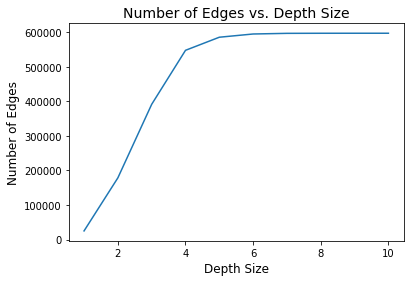

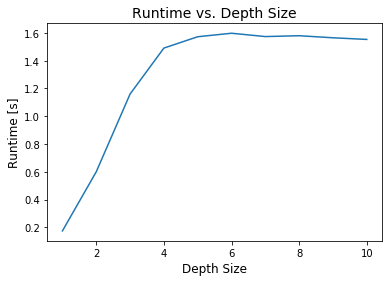

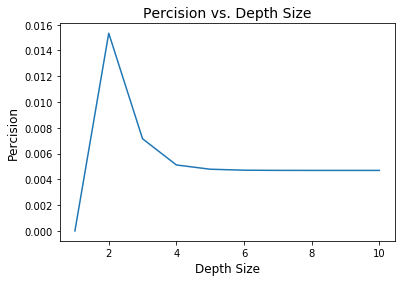

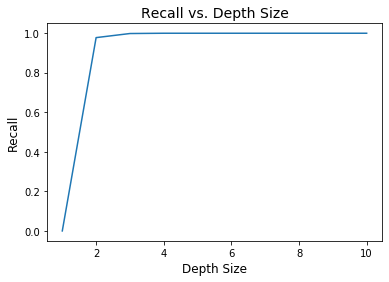

In [7]:
trainData,testData = load_data("training_set.tsv", "testing_set.tsv")
n_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_edges = []
times = []
percisionData = []
recallData = []

for depth in n_depth:
    num_edges.append(benchmark_numRec(trainData, depth))
    times.append(benchmark_runtime(trainData, depth))
    percisionData.append(eval_percision(trainData, testData, depth))
    recallData.append(eval_recall(trainData, testData, depth))

plot_results(n_depth, num_edges, times, percisionData, recallData)